#Datathon 1.0
##16th July to 17th July

# Problem Statement

> You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers.

> Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. 

> Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call.
 
> We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.








#Dataset:
###Input Features:

*   age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

###Output variable (desired target):
*   y - has the client subscribed to the insurance?(yes/no)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Customer Conversion Prediction - Customer Conversion Prediction.csv")
import seaborn as sns

In [2]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


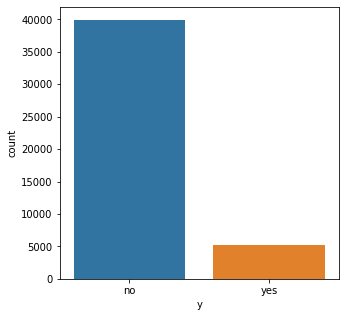

In [6]:
plt.figure(figsize=(5,5)) 
sns.countplot(x = 'y', data = df)

**The above plot shows no.of people who subscribed.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text major ticklabel objects>)

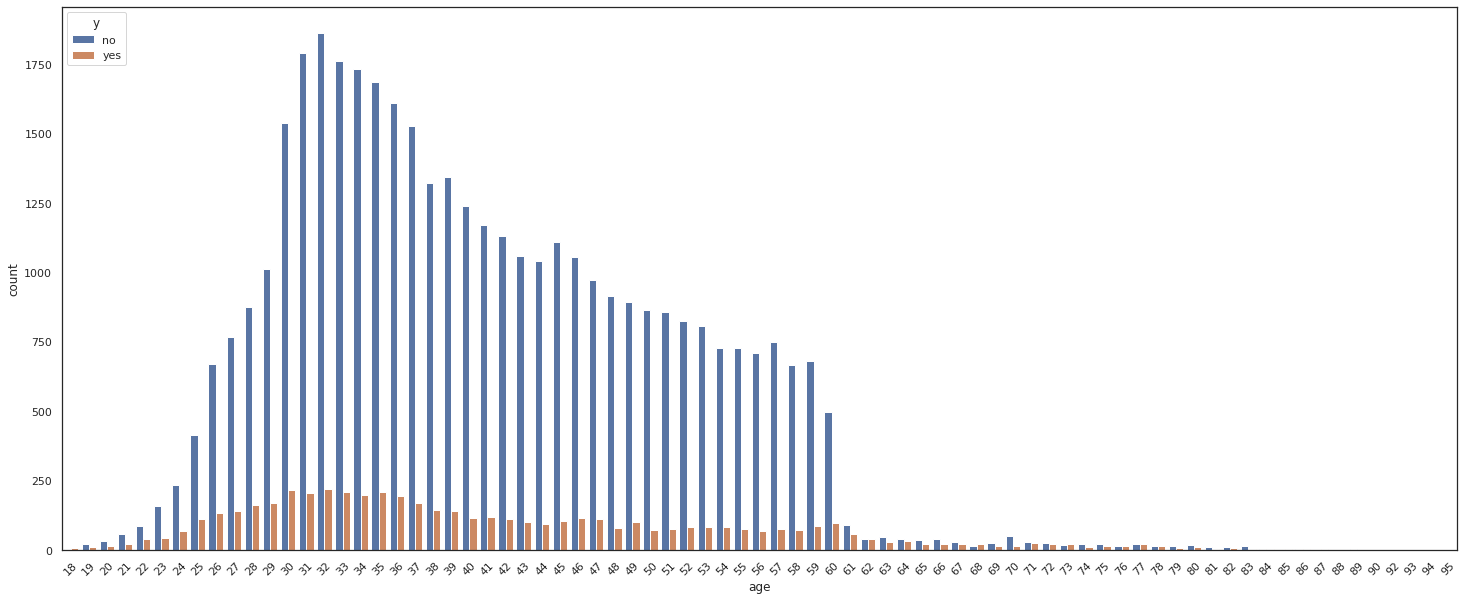

In [7]:
plt.figure(figsize=(25,10)) 
sns.set(style='white') 
sns.countplot(x="age",hue="y",data=df) 
plt.xticks(rotation=45,)

###**Customers from the age group of 25 to 60 are mostly subscribing to insurance**

In [8]:
default_by_group_1 = round(pd.crosstab(index=df['y'],columns = df["job"], normalize = 'columns')*100)
default_by_group_1

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,88.0,93.0,92.0,91.0,86.0,77.0,88.0,91.0,71.0,89.0,84.0,88.0
yes,12.0,7.0,8.0,9.0,14.0,23.0,12.0,9.0,29.0,11.0,16.0,12.0


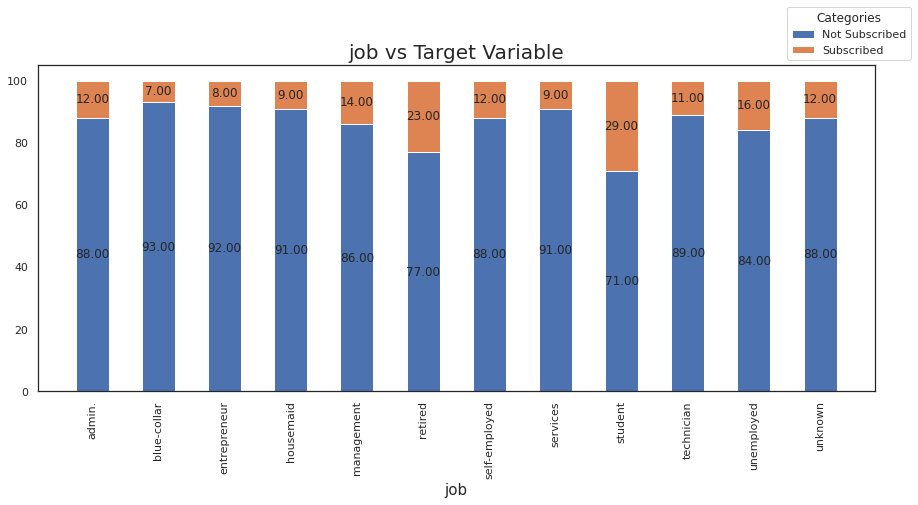

In [9]:
labels = default_by_group_1.columns
list1 = default_by_group_1.iloc[0].to_list()
list2 = default_by_group_1.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("job", size=15)
  
# Setting the title for the graph
plt.title("job vs Target Variable", size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**Customers belonging to student category are having max. subscription**

In [10]:
default_by_group_2 = round(pd.crosstab(index=df['y'],columns = df["education_qual"], normalize = 'columns')*100)
default_by_group_2

education_qual,primary,secondary,tertiary,unknown
y,,,,
no,91.0,89.0,85.0,86.0
yes,9.0,11.0,15.0,14.0


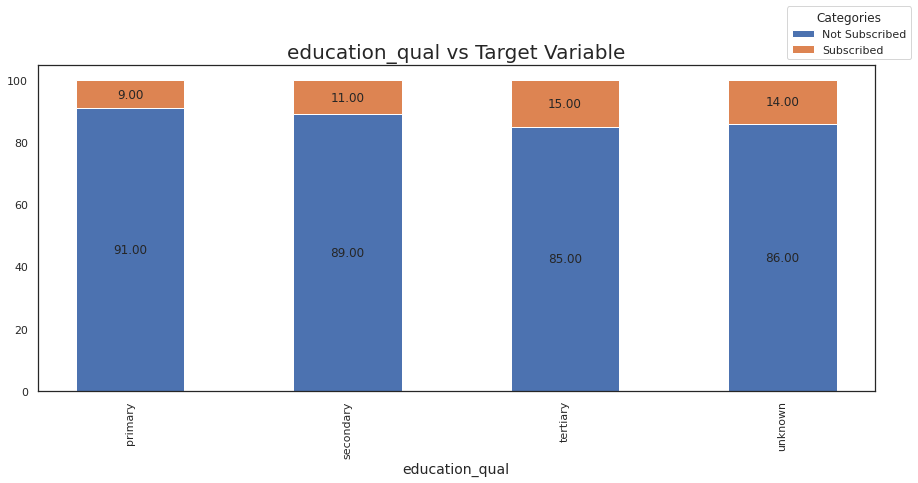

In [11]:
labels = default_by_group_2.columns
list1 = default_by_group_2.iloc[0].to_list()
list2 = default_by_group_2.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("education_qual", size=14)
  
# Setting the title for the graph
plt.title("education_qual vs Target Variable",size =20)
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**From the above plot we can say that, Tertiary has more subscribers as compared to others**

In [12]:
default_by_group_3 = round(pd.crosstab(index=df['y'],columns = df["marital"], normalize = 'columns')*100)
default_by_group_3

marital,divorced,married,single
y,,,
no,88.0,90.0,85.0
yes,12.0,10.0,15.0


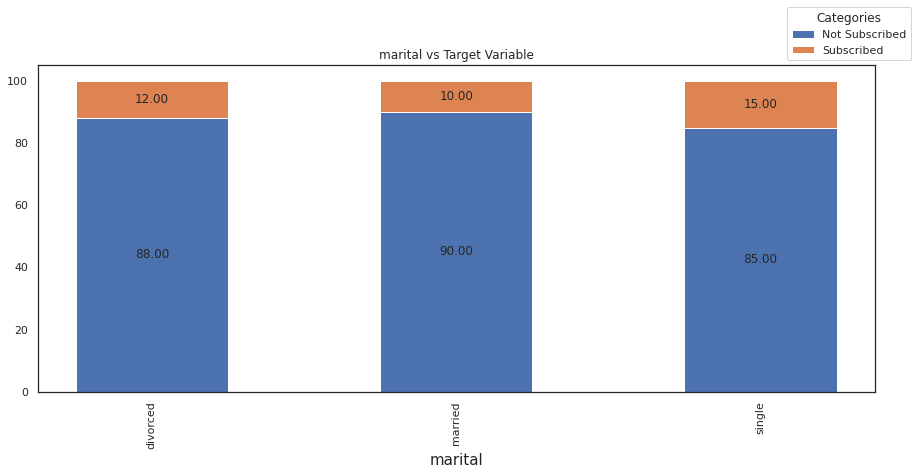

In [13]:
labels = default_by_group_3.columns
list1 = default_by_group_3.iloc[0].to_list()
list2 = default_by_group_3.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("marital", size=15)     
# Setting the title for the graph
ax.set_title("marital vs Target Variable")
 
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')

plt.show()

###**From the above plot we can say that, Singles have highest subscription**

In [38]:
default_by_group_4 = round(pd.crosstab(index=df['y'],columns = df["call_type"], normalize = 'columns')*100)
default_by_group_4

call_type,cellular,telephone,unknown
y,,,
no,85.0,87.0,96.0
yes,15.0,13.0,4.0


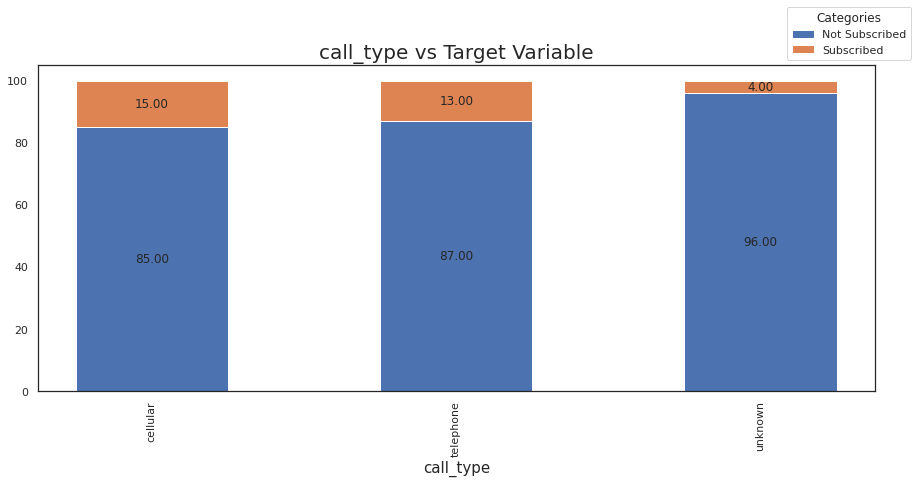

In [40]:
labels = default_by_group_4.columns
list1 = default_by_group_4.iloc[0].to_list()
list2 = default_by_group_4.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xlabel("call_type", size=15)
plt.title("call_type vs Target Variable", size = 20)
plt.xticks(rotation=90)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**Above plot shows that people using cellular phone has the highest subscription**

In [31]:
default_by_group_5 = round(pd.crosstab(index=df['y'],columns = df["day"], normalize = 'columns')*100)
default_by_group_5

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
y,,,,,,,,,,,,,,,,,,,,,
no,72.0,86.0,84.0,84.0,89.0,91.0,91.0,89.0,89.0,77.0,...,83.0,87.0,86.0,84.0,89.0,87.0,92.0,93.0,83.0,93.0
yes,28.0,14.0,16.0,16.0,11.0,9.0,9.0,11.0,11.0,23.0,...,17.0,13.0,14.0,16.0,11.0,13.0,8.0,7.0,17.0,7.0


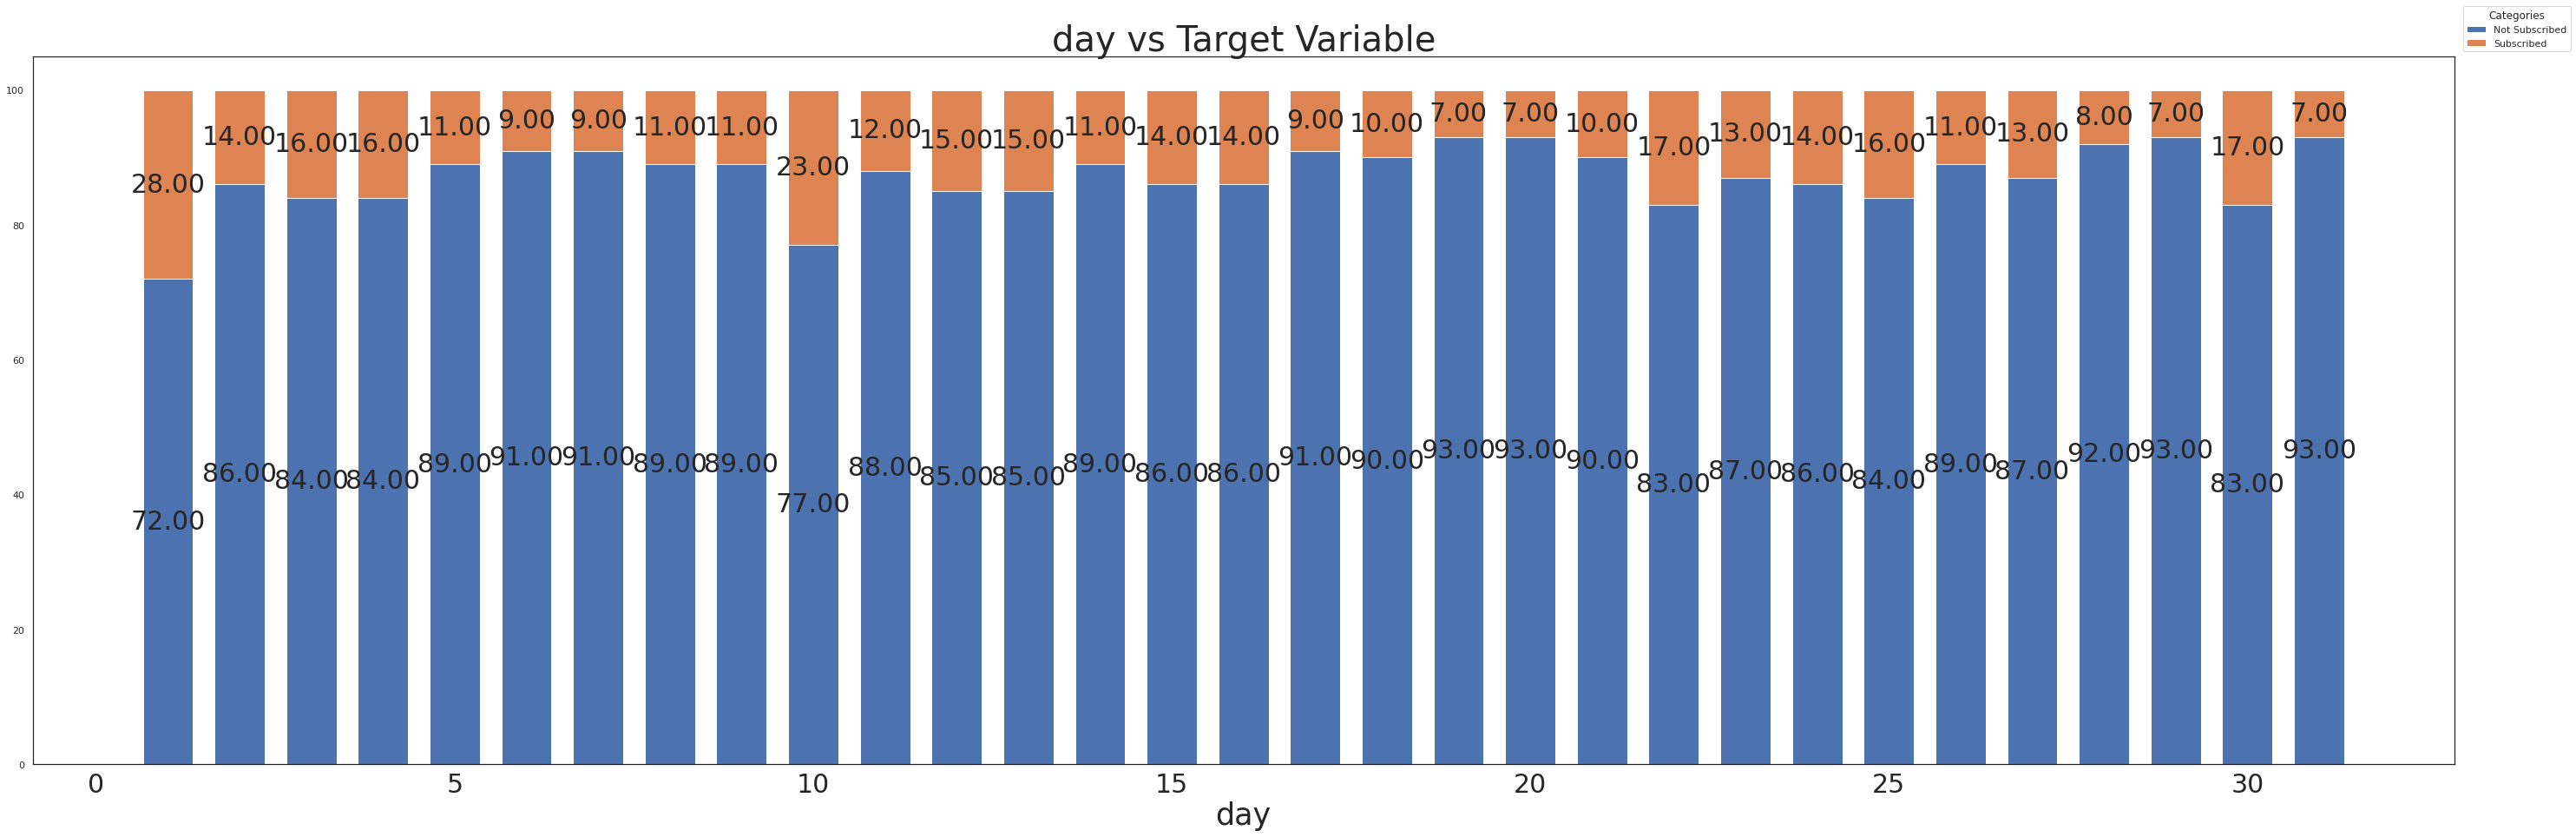

In [32]:
labels = default_by_group_5.columns
list1 = default_by_group_5.iloc[0].to_list()
list2 = default_by_group_5.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (50,15))
bar_width = 0.7
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize = 30)
plt.xlabel("day", size=35)    
plt.title("day vs Target Variable",size = 40)
plt.xticks(rotation=0,fontsize = 30)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**First day of the month has most subscriptions**

In [33]:
default_by_group_6 = round(pd.crosstab(index=df['y'],columns = df["mon"], normalize = 'columns')*100)
default_by_group_6

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,,,
no,80.0,89.0,53.0,83.0,90.0,91.0,90.0,48.0,93.0,90.0,56.0,54.0
yes,20.0,11.0,47.0,17.0,10.0,9.0,10.0,52.0,7.0,10.0,44.0,46.0


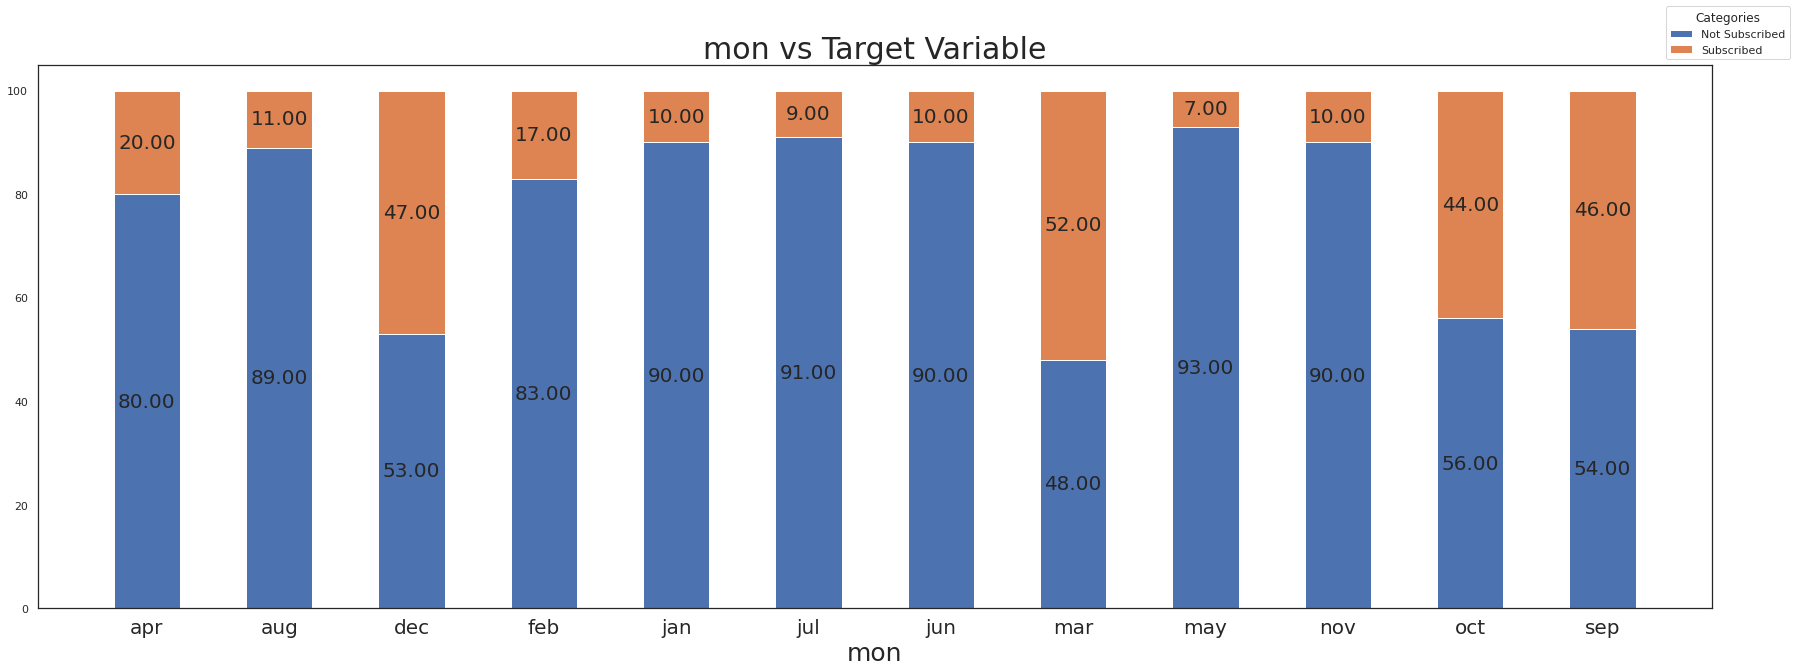

In [34]:
labels = default_by_group_6.columns
list1 = default_by_group_6.iloc[0].to_list()
list2 = default_by_group_6.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (30,10))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',fontsize = 20)
plt.xlabel("mon", size=25)    
plt.title("mon vs Target Variable",size=30)
plt.xticks(rotation=0, fontsize = 20)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**March month has more subscriptions when compared to others**

In [35]:
default_by_group_7 = round(pd.crosstab(index=df['y'],columns = df["prev_outcome"], normalize = 'columns')*100)
default_by_group_7

prev_outcome,failure,other,success,unknown
y,,,,
no,87.0,83.0,35.0,91.0
yes,13.0,17.0,65.0,9.0


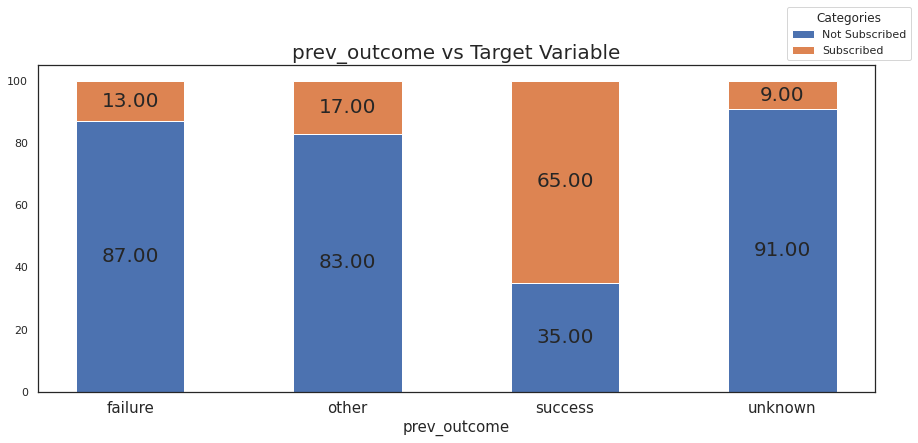

In [37]:
labels = default_by_group_7.columns
list1 = default_by_group_7.iloc[0].to_list()
list2 = default_by_group_7.iloc[1].to_list()
fig, ax = plt.subplots(figsize = (15,6))
bar_width = 0.5
ax.bar(labels,list1, bar_width, label = "Not Subscribed")
ax.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',fontsize = 20)
plt.xlabel("prev_outcome", size=15)    
plt.title("prev_outcome vs Target Variable",fontsize=20)
plt.xticks(rotation=0, fontsize = 15)
ax.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**When the prev_outcome is success, there are more subscriptions** 

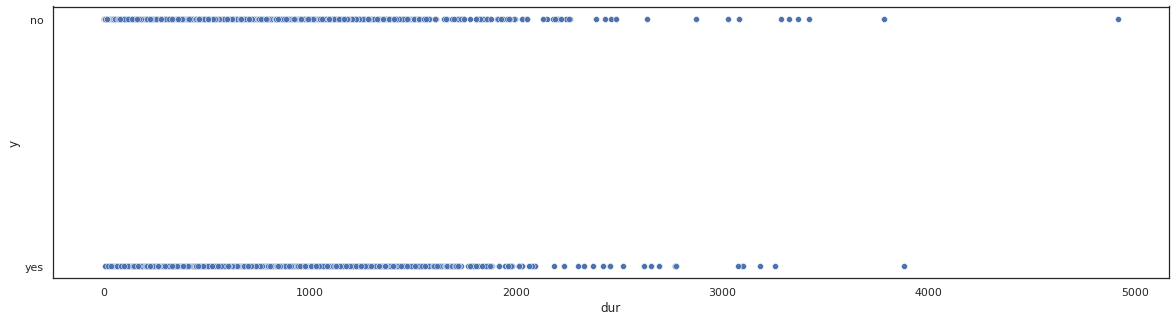

In [22]:
fig, axes=plt.subplots(ncols=1,figsize=(20,5)) 
sns.scatterplot(x='dur', y = 'y', data=df)

###**If duration of the call is less than 2000 sec, subscription is more**

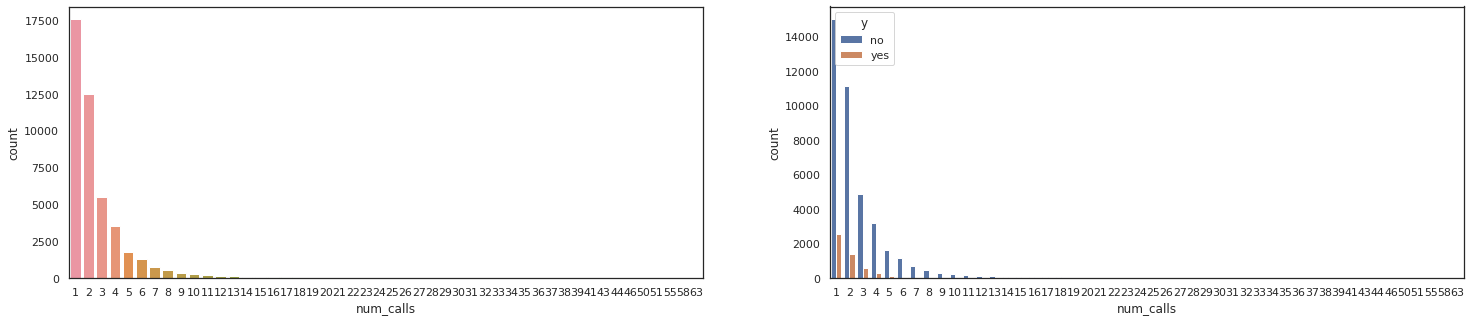

In [23]:
ig, axes=plt.subplots(ncols=2,figsize=(25,5)) 
sns.countplot(x='num_calls', ax=axes[0], data=df) 
sns.countplot(x='num_calls', hue='y', ax=axes[1], data=df)

In [24]:
default_by_group_8 = round(pd.crosstab(index=df['y'],columns = df["num_calls"], normalize = 'columns')*100)
default_by_group_8

num_calls,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
y,,,,,,,,,,,,,,,,,,,,,
no,85.0,89.0,89.0,91.0,92.0,93.0,94.0,94.0,94.0,95.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
yes,15.0,11.0,11.0,9.0,8.0,7.0,6.0,6.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


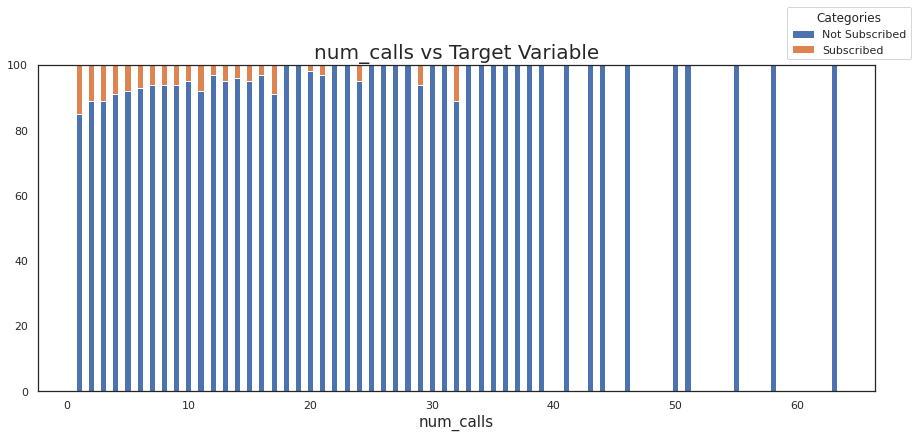

In [26]:
labels = default_by_group_8.columns
list1 = default_by_group_8.iloc[0].to_list()
list2 = default_by_group_8.iloc[1].to_list()
plt.figure(figsize = (15,6))
bar_width = 0.5
ax1 = plt.bar(labels,list1, bar_width, label = "Not Subscribed")
ax2 = plt.bar(labels,list2, bar_width, bottom = list1, label = "Subscribed")
plt.xlabel("num_calls", size=15)
plt.title("num_calls vs Target Variable",size = 20)
plt.xticks(rotation=0)
plt.legend(title = "Categories", bbox_to_anchor= (1.05,1), loc = 'lower right')
plt.show()

###**If the number of calls increases, subscriptions decreases**

In [ ]:
x=df[["age","job","marital","education_qual","call_type","day","mon","dur","num_calls","prev_outcome"]]


In [ ]:
df=pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])


In [ ]:
df

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,no,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,no,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,no,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,no,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#df.drop(['job','marital','education_qual','call_type','mon','prev_outcome'], inplace=True)

In [ ]:
df

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,no,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,no,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,no,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,no,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,yes,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,no,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.y = df.y.map({'no': 0,'yes': 1})

In [ ]:
df

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'y')], df['y'])
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 45211
Resampled balanced dataset shape 79844


In [ ]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'y'))

balanced_df['y'] = y_smote

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


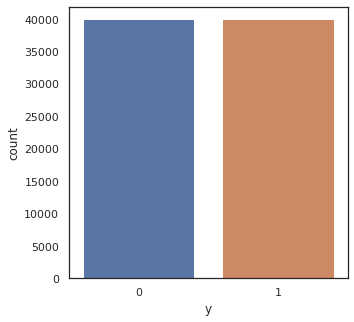

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot('y', data = balanced_df)

In [ ]:
balanced_df['y'].value_counts()

0    39922
1    39922
Name: y, dtype: int64

#Feature Importance

In [ ]:
Y1 = balanced_df['y']


In [ ]:
X = balanced_df.drop(['y'],axis=1)
X.columns


Index(['age', 'day', 'dur', 'num_calls', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,Y1) 
feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False)


,0
dur,0.237941
prev_outcome_unknown,0.079249
call_type_unknown,0.055907
mon_may,0.050238
age,0.049500
day,0.046963
prev_outcome_failure,0.038785
job_blue-collar,0.032356
mon_jul,0.031337
marital_married,0.030906


In [ ]:
import numpy as np

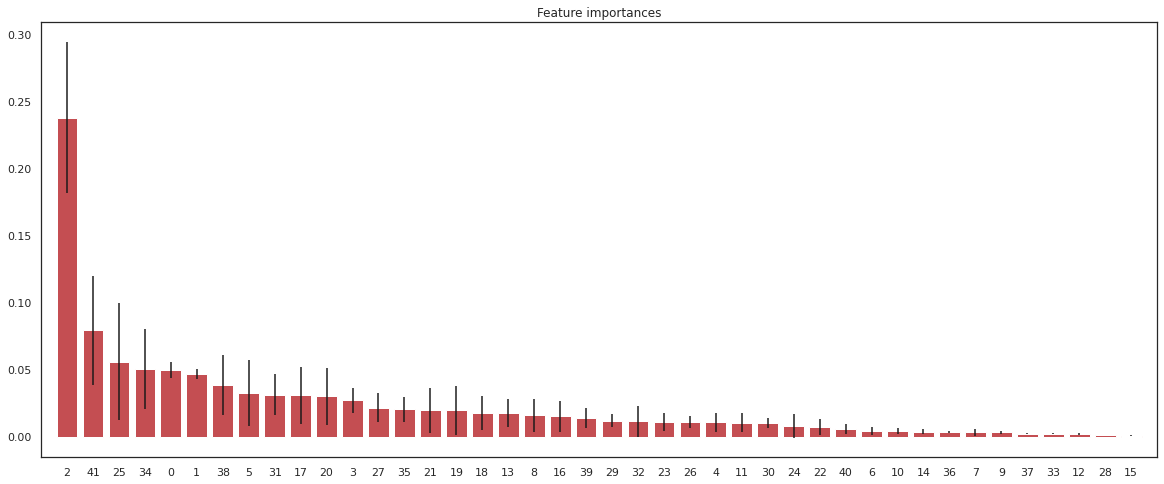

In [ ]:
indices = np.argsort(clf.feature_importances_)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), clf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

**dur,age are the features with more importance than others** 

In [ ]:
X

,age,day,dur,num_calls,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,52,6,158,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79840,78,20,136,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
79841,30,4,193,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79842,25,20,158,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y1

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: y, Length: 79844, dtype: int64

##Train set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y1, test_size=0.2, random_state = 42)

# ML Classification Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', solver = 'liblinear', max_iter = 500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [ ]:
lr.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

0.9851153605754102

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
roc_auc_score(y_test, RF.predict_proba(x_test)[:, 1])

0.9897255668823148

## XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)

XGBClassifier()

In [ ]:
roc_auc_score(y_test, xgbc.predict_proba(x_test)[:, 1])

0.9850733346648597

## Out of the 3 Classification models, Random Forest gives better Au-ROC score of 0.989, hence this model is chosen

## Prediction from user input

In [ ]:
number_of_inputs = int(input("Enter the number of inputs: "))

Enter the number of inputs: 1


In [ ]:
for _ in range(number_of_inputs):
    age1 = int(input("Enter the Age: "))
    job1 = input("Enter the job: ")
    marital1 = input("Enter the marital status: ")
    education_qual1 = input("Enter the education qualification: ")
    call_type1 = input("Enter the call_type: ")
    day1 = int(input("Enter the day: "))
    mon1 = input("Enter the month: ")
    dur1 = int(input("Enter the duration: "))
    num_calls1 = int(input("Enter the number of calls: ")) 
    prev_outcome1 = input("Enter the previous outcome: ")
    df_input = pd.DataFrame(data = [[age1,job1,marital1,education_qual1,call_type1,day1,mon1,dur1,num_calls1,prev_outcome1]], columns=["age", "job", "marital", "education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"])

Enter the Age: 27
Enter the job: student
Enter the marital status: single
Enter the education qualification: secondary
Enter the call_type: unknown
Enter the day: 5
Enter the month: may
Enter the duration: 550
Enter the number of calls: 1
Enter the previous outcome: unknown


In [ ]:
print(df_input)

   age      job marital education_qual call_type  day  mon  dur  num_calls  \
0   27  student  single      secondary   unknown    5  may  550          1   

  prev_outcome  
0      unknown  


In [ ]:
df_input = pd.get_dummies(df_input, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])


In [ ]:
df_input

,age,day,dur,num_calls,job_student,marital_single,education_qual_secondary,call_type_unknown,mon_may,prev_outcome_unknown
0,27,5,550,1,1,1,1,1,1,1


In [ ]:
df_input3 = pd.DataFrame(data = df_input,columns = ['age', 'day', 'dur', 'num_calls', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'])

In [ ]:
df_input3 = df_input3.fillna(0)

In [ ]:
df_input3.isna().sum()

##Prediction for input from user

In [ ]:
RF.predict(df_input3)

array([0])

#Conclusion

###1. Random Forest model gave better Au-ROC score of 0.989, hence this model is chosen for predicting customer subscription
###2. Code is also written to take input from user and give prediction
###3. If there is more information on previous outcome and call_type, it will be useful to improve the ML model and useful for the business as well 